In [1]:
import yahoo_fin.stock_info as si
import pandas as pd
%matplotlib inline

In [2]:
dow_jones_tickers = si.tickers_dow()

In [3]:
prices = list(map(si.get_live_price, dow_jones_tickers))

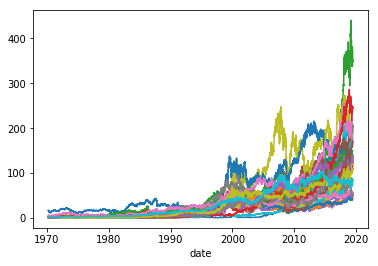

In [4]:
for ticker in dow_jones_tickers:
    si.get_data(ticker)['close'].plot('line')

In [5]:
import yahoo_fin.stock_info as si

dow_table = pd.DataFrame([si.tickers_dow(), list(map(si.get_live_price, si.tickers_dow()))])
dow_table = dow_table.transpose()
dow_table.columns = ['Company', 'Price']
dow_table

,Company,Price
0,AAPL,198.45
1,AXP,123.43
2,BA,373.96
3,CAT,130.33
4,CSCO,56.05
5,CVX,122.93
6,DIS,139.24
7,DOW,49.61
8,GS,194.98
9,HD,207.48


In [6]:
# Extracted from  https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average

company_names = [
'3M',
'American Express',
'Apple',
'Boeing',
'Caterpillar',
'Chevron',
'Cisco Systems',
'Coca-Cola',
'Dow Inc.',
'ExxonMobil',
'Goldman Sachs',
'The Home Depot',
'IBM',
'Intel',
'Johnson & Johnson',
'JPMorgan Chase',
'McDonald\'s',
'Merck & Company',
'Microsoft',
'Nike',
'Pfizer',
'Procter & Gamble',
'Travelers',
'UnitedHealth Group',
'United Technologies',
'Verizon',
'Visa',
'Walmart',
'Walgreens Boots Alliance',
'Walt Disney',
]

symbol = [
'MMM',
'AXP',
'AAPL',
'BA',
'CAT',
'CVX',
'CSCO',
'KO',
'DOW',
'XOM',
'GS',
'HD',
'IBM',
'INTC',
'JNJ',
'JPM',
'MCD',
'MRK',
'MSFT',
'NKE',
'PFE',
'PG',
'TRV',
'UNH',
'UTX',
'VZ',
'V',
'WMT',
'WBA',
'DIS',
]

industry = [
'Conglomerate',
'Financial services',
'Information technologies',
'Aerospace and defense',
'Construction and mining equipment',
'Oil & gas',
'Information technologies',
'Food',
'Chemical industry',
'Oil & gas',
'Financial services',
'Retail',
'Information technologies',
'Information technologies',
'Pharmaceuticals',
'Financial services',
'Food',
'Pharmaceuticals',
'Information technologies',
'Apparel',
'Pharmaceuticals',
'Consumer goods',
'Insurance',
'Managed health care',
'Conglomerate',
'Telecommunication',
'Financial services',
'Retail',
'Retail',
'Broadcasting and entertainment'
]

ticker2name = {k:v for k,v in zip(symbol, company_names) }
ticker2industry = {k:v for k,v in zip(symbol, industry) }


In [7]:
powers = {'T': 10 ** 12, 'B': 10 ** 9, 'M': 10 ** 6}

def f(s):
    try:
        power = s[-1]
        return float(s[:-1]) * powers[power]
    except TypeError:
        return s


def get_stats(ticker):
    stats = si.get_stats(ticker)
    values = list(stats['Value'])
    atb = list(stats['Attribute'])
    return values, atb

def create_dow_table(index):
    
    tickers = si.tickers_dow()
    
    table = pd.DataFrame(columns=['Company', 'Price'] + get_stats(tickers[0])[1], index=tickers)
    table['Company'] = tickers
    table['Price'] = list(map(si.get_live_price, table['Company']))
    table[table.columns.drop(['Company', 'Price'])] = list(map(lambda x: get_stats(x)[0], table['Company']))
    return table

dow = create_dow_table('dow')
dow['Cap'] = dow['Market Cap (intraday) 5'].apply(f)
dow.index = dow['Company'].apply(lambda x: ticker2name[x])
dow['Industry'] = dow['Company'].apply(lambda x: ticker2industry[x])
dow

,Company,Price,Market Cap (intraday) 5,Enterprise Value 3,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Enterprise Value/Revenue 3,...,Trailing Annual Dividend Rate 3,Trailing Annual Dividend Yield 3,5 Year Average Dividend Yield 4,Payout Ratio 4,Dividend Date 3,Ex-Dividend Date 4,Last Split Factor (new per old) 2,Last Split Date 3,Cap,Industry
Company,,,,,,,,,,,,,,,,,,,,,
Apple,AAPL,198.449997,913.08B,919.35B,16.69,15.69,1.31,3.53,8.64,3.56,...,2.92,1.51%,1.67,24.46%,"May 16, 2019","May 10, 2019",1/7,"Jun 9, 2014",9.130800e+11,Information technologies
American Express,AXP,123.430000,103.07B,129.97B,15.72,13.71,1.55,2.74,4.65,3.46,...,1.52,1.25%,1.45,19.36%,"Aug 9, 2019","Jul 3, 2019",8753/10000,"Oct 3, 2005",1.030700e+11,Financial services
Boeing,BA,373.959991,210.4B,207.86B,21.41,16.59,1.19,2.09,1684.50,2.07,...,7.18,2.02%,2.31,41.17%,"Jun 7, 2019","May 9, 2019",1/2,"Jun 9, 1997",2.104000e+11,Aerospace and defense
Caterpillar,CAT,130.330002,74.53B,103.01B,12.12,10.00,0.52,1.35,4.83,1.86,...,3.44,2.70%,3.01,31.20%,"Aug 20, 2019","Jul 19, 2019",1/2,"Jul 14, 2005",7.453000e+10,Construction and mining equipment
Cisco Systems,CSCO,56.049999,239.93B,226.22B,19.45,16.44,1.70,4.68,6.57,4.41,...,1.34,2.42%,2.94,46.69%,"Jul 24, 2019","Jul 3, 2019",1/2,"Mar 23, 2000",2.399300e+11,Information technologies
Chevron,CVX,122.930000,234.17B,259.64B,17.00,13.72,0.92,1.49,1.51,1.65,...,4.55,3.75%,4.00,62.93%,"Jun 10, 2019","May 16, 2019",1/2,"Sep 13, 2004",2.341700e+11,Oil & gas
Walt Disney,DIS,139.240005,250.59B,316.06B,15.58,21.49,11.40,4.19,2.76,5.29,...,0.88,0.62%,1.39,19.28%,"Jan 10, 2019","Dec 7, 2018",1000/1014,"Jun 13, 2007",2.505900e+11,Broadcasting and entertainment
Dow Inc.,DOW,49.610001,37.15B,NaN,NaN,9.26,1.56,0.75,NaN,NaN,...,1.52,3.08%,NaN,0.00%,"Jun 14, 2019","May 30, 2019",NaN,NaN,3.715000e+10,Chemical industry
Goldman Sachs,GS,194.979996,71.33B,-230B,8.12,7.52,1.29,2.07,0.90,-6.67,...,3.20,1.68%,1.35,13.32%,"Jun 27, 2019","May 29, 2019",NaN,NaN,7.133000e+10,Financial services


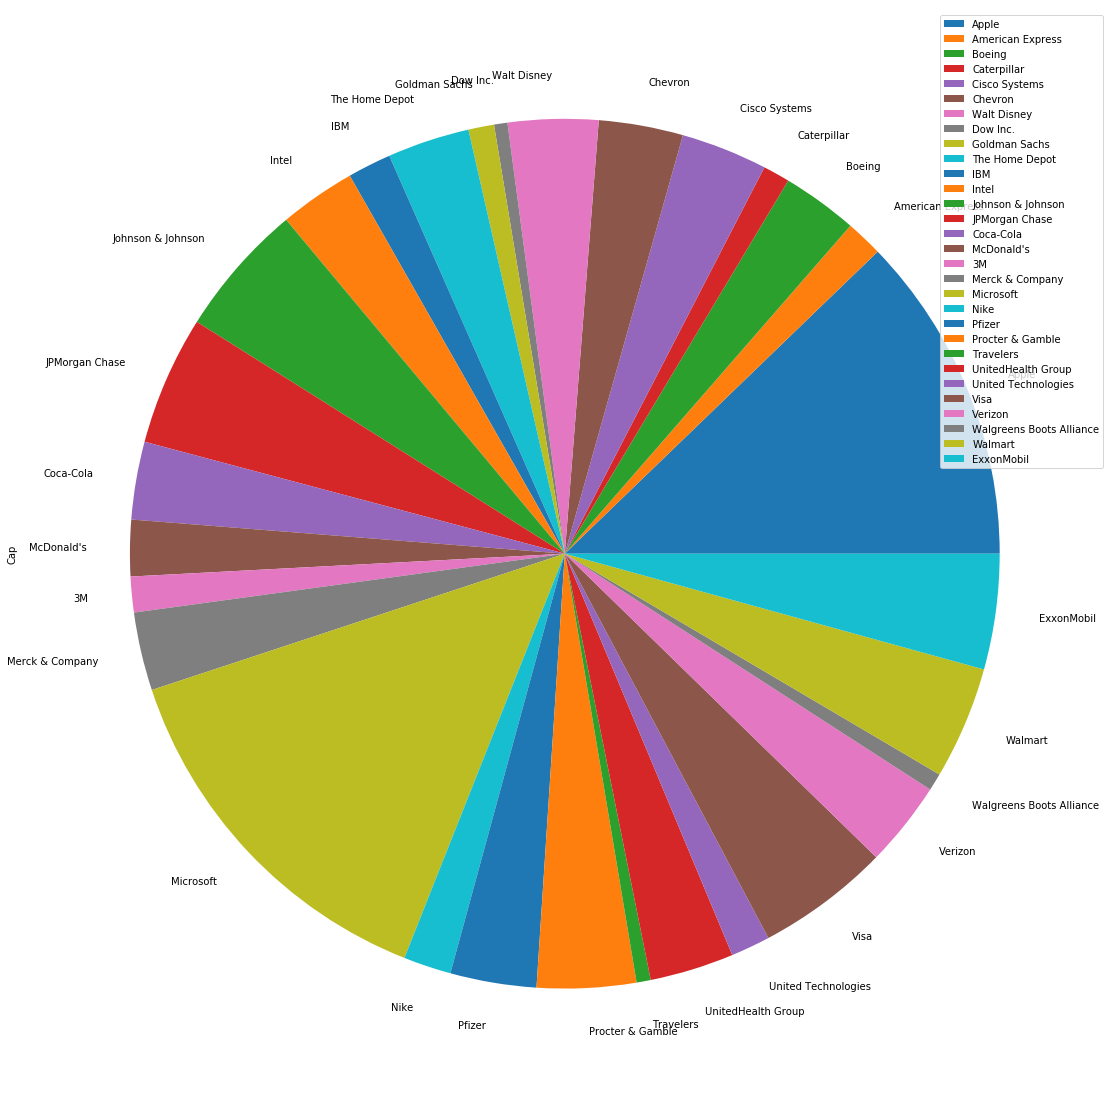

In [8]:
dow.plot.pie(y='Cap', figsize=(20,20))

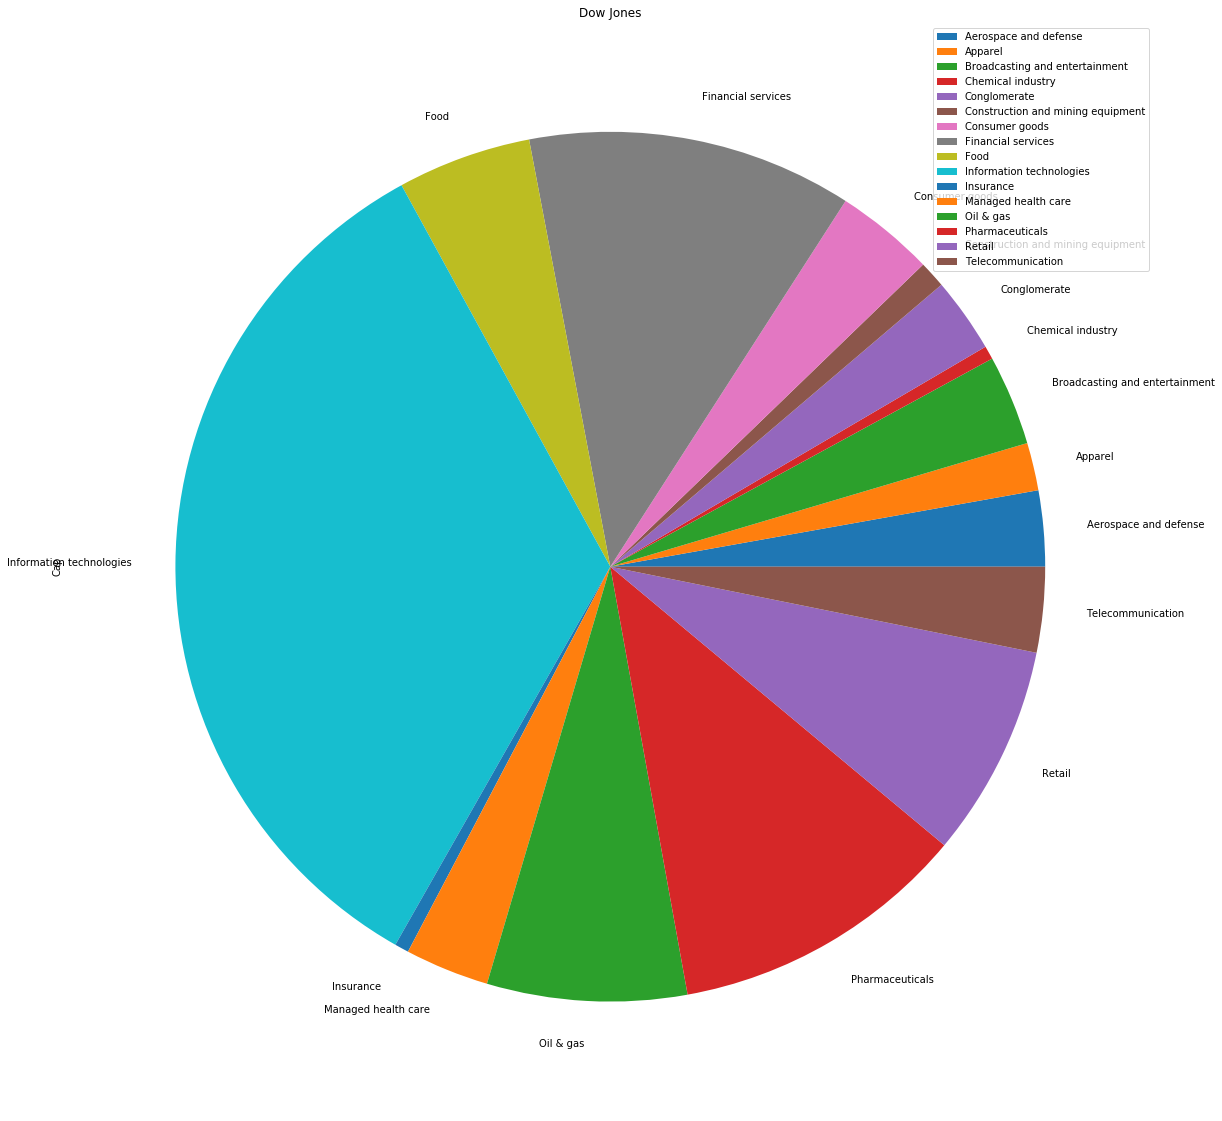

In [9]:
dow[['Industry', 'Cap']].groupby('Industry').agg('sum').plot.pie(y='Cap', figsize=(20,20), title='Dow Jones')